#  Приоритизация гипотез и оценка результатов АВ-теста в интернет-магазине

**Проблема**

Вместе с отделом маркетинга подготовлены несколько гипотез по увеличению выручки, которые нужно проверить с помощью A/B-теста.

**Цель**

Приоритизировать гипотезы по увеличению выручки методами **ICE** и **RICE**, а также провести анализ A/B-теста, чтобы максимально повысить выручку интернет-магазина.

**Задачи**

1. Приоритизировать гипотезы;
2. Провести A/B-тест;
3. Проанализировать результаты A/B-теста.


**План**

1. Подготовка данных.

2. Приоритизация гипотез.

3. Исследовательский анализ A/B-теста.

4. Статистический анализ A/B-теста.

5. Общие выводы

**Описание данных**

В файле `/datasets/hypothesis.csv` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

# Подготовка данных

## Импорт библиотек и загрузка данных

In [1]:
# импорт библиотек
import pandas as pd                             # для анализа данных
import numpy as np                              # для математических вычислений

import seaborn as sns                           # для визуализации данных
from matplotlib import pyplot as plt            # для визуализации данных
%matplotlib inline

import datetime as dt                           # для преобразования к типу данных
from datetime import datetime      
import scipy.stats as stats                     # для высокоуровневых математических вычислений                  

import warnings                                 # для предупреждений в программе 
warnings.filterwarnings('ignore')               # игнорировать предупреждения

In [2]:
# создание переменных с датафреймами  
hypothesis = pd.read_csv('/datasets/hypothesis.csv') # гипотезы
orders = pd.read_csv('/datasets/orders.csv')         # заказы
visitors = pd.read_csv('/datasets/visitors.csv')     # пользователи

# с помощью pd.option настроим вывод так, чтобы:
pd.options.display.max_columns = None
pd.options.display.max_colwidth = -1                 # текст в ячейке отражался полностью вне зависимости от длины;
pd.options.display.float_format = '{:.2f}'.format    # все числа отражались с двумя знаками после запятой.

## Обзор данных

### Таблица `hypothesis`

+ `Hypothesis` — краткое описание гипотезы;

+ `Reach` — охват пользователей по 10-балльной шкале;

+ `Impact` — влияние на пользователей по 10-балльной шкале;

+ `Confidence` — уверенность в гипотезе по 10-балльной шкале;

+ `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [3]:
# случайная выборка, статистика и общая информация о датафрейме в одной мини-функции

def info_dataframe(dataframe):
    display("5 первых строк таблицы:")
    display(dataframe.head())
    display("Статистика данных:")
    display(dataframe.describe())
    display("Общая информация о данных:")
    dataframe.info()
    
info_dataframe(hypothesis)

'5 первых строк таблицы:'

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


'Статистика данных:'

,Reach,Impact,Confidence,Efforts
count,9.00,9.00,9.00,9.00
mean,4.78,4.78,5.56,4.89
std,3.15,3.19,3.05,2.80
min,1.00,1.00,1.00,1.00
25%,3.00,3.00,3.00,3.00
50%,3.00,3.00,7.00,5.00
75%,8.00,7.00,8.00,6.00
max,10.00,10.00,9.00,10.00


'Общая информация о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Таблица `orders`

+ `transactionId` — идентификатор заказа;

+ `visitorId` — идентификатор пользователя, совершившего заказ;

+ `date` — дата, когда был совершён заказ;

+ `revenue` — выручка заказа;

+ `group` — группа A/B-теста, в которую попал заказ.

In [4]:
info_dataframe(orders)

'5 первых строк таблицы:'

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


'Статистика данных:'

,transactionId,visitorId,revenue
count,1197.00,1197.00,1197.00
mean,2155621385.53,2165960143.10,8348.01
std,1229084904.76,1236014192.15,39191.13
min,1062393.00,5114589.00,50.00
25%,1166775572.00,1111826046.00,1220.00
50%,2145193898.00,2217984702.00,2978.00
75%,3237740112.00,3177606451.00,8290.00
max,4293855558.00,4283872382.00,1294500.00


'Общая информация о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


### Таблица `visitors`

+ `date` — дата;

+ `group` — группа A/B-теста;

+ `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста


In [5]:
info_dataframe(visitors)

'5 первых строк таблицы:'

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


'Статистика данных:'

,visitors
count,62.00
mean,607.29
std,114.40
min,361.00
25%,534.00
50%,624.50
75%,710.50
max,770.00


'Общая информация о данных:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


***Выводы***

1. Данные за период с 1.08.2019 по 31.08.2019 распределены в 3 датасетах. 

    1.1. Датасет `hypothesis` содержит информацию о 9 гипотезах по увеличению выручки интернет-магазина. 

    1.2. Датасет `orders` о заказах, пользователях, из совершивших и группе A/B-теста, в которую попал заказ. 

    1.3. Датасет `visitors` о количестве пользователей в указанную дату в указанной группе A/B-теста.

2. Проблемы со стилем в заголовках во всех датасетах.

3. Неверный тип данных в датасетах `orders` (колонка `date`) и `visitors` (колонка `date`).

## Обработка данных
### Стиль заголовков
Исправим стиль заголовков и переименуем некоторые колонки для большего удобства:

In [6]:
# приведём заголовки к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()

# переименуем колонки с неправильным стилем 
# и колнку transactionId на order_id, и visitorId на user_id
orders.columns = ['order_id', 'user_id', 'date', 'revenue', 'group']
visitors.columns = ['date', 'group', 'visitors']

print('Стиль заголовков исправлен:\n')
print(hypothesis.columns)
print(orders.columns)
visitors.columns

Стиль заголовков исправлен:

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')
Index(['order_id', 'user_id', 'date', 'revenue', 'group'], dtype='object')


Index(['date', 'group', 'visitors'], dtype='object')

### Обработка пропусков
Посмотрим наличие пропусков:

In [7]:
display('Количество пропусков в датафрейме visits:', hypothesis.isna().sum())
display('Количество пропусков в датафрейме orders:', orders.isna().sum())
display('Количество пропусков в датафрейме costs:', visitors.isna().sum())

'Количество пропусков в датафрейме visits:'

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

'Количество пропусков в датафрейме orders:'

order_id    0
user_id     0
date        0
revenue     0
group       0
dtype: int64

'Количество пропусков в датафрейме costs:'

date        0
group       0
visitors    0
dtype: int64

Пропусков нет.

### Изменение типа данных
Изменим тип данных в колонках:

Датасет `orders`:

+ `date` (на datetime - столбец содержит значения даты).

Датасет `visitors`:

+ `date` (на datetime - столбец содержит значения даты).

In [8]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

### Обработка дубликатов
Проверим таблицы на явные дубликаты:

In [9]:
print('Количество строк-дубликатов в датафрейме hypothesis:', hypothesis.duplicated().sum())
print('Количество строк-дубликатов в датафрейме orders:', orders.duplicated().sum())
print('Количество строк-дубликатов в датафрейме visitors:', visitors.duplicated().sum())

Количество строк-дубликатов в датафрейме hypothesis: 0
Количество строк-дубликатов в датафрейме orders: 0
Количество строк-дубликатов в датафрейме visitors: 0


Дубликатов не обнаружено.

### Минимальная и максимальная дата
Посмотрим за какой период имеются данные.

In [10]:
display('Дата первого заказа:', orders['date'].min())
display('Дата первого визита:', visitors['date'].min())

'Дата первого заказа:'

Timestamp('2019-08-01 00:00:00')

'Дата первого визита:'

Timestamp('2019-08-01 00:00:00')

In [11]:
# дата регистрации последнего пользователя в 2018 году
display('Дата последнего заказа:', orders['date'].max())
display('Дата последнего визита:', visitors['date'].max())

'Дата последнего заказа:'

Timestamp('2019-08-31 00:00:00')

'Дата последнего визита:'

Timestamp('2019-08-31 00:00:00')

## Проверим корректность групп для А/В теста
### Количество групп А/В теста

In [12]:
print('Всего групп',visitors['group'].nunique(),':',visitors['group'].unique())

Всего групп 2 : ['A' 'B']


### Количество пользователей в каждой группе

In [13]:
orders.groupby(by='group', as_index=False).agg({'user_id':'nunique'})

,group,user_id
0,A,503
1,B,586


### Количество пользователей в обеих группах

In [14]:
duplicated_users = orders.groupby(by='user_id').agg({'group' : ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
print('Количество пользователей, попавших в обе группы равно:', len(duplicated_users))

Количество пользователей, попавших в обе группы равно: 58


**Итоги**
1. Пользоветелей в группе В на 16% больше, чем в группе А.
2. 58 пользователей попали в обе группы А/В теста.
**Вывод**

Таким образом, **результаты** А/В теста **не будут корректными** из-за наличия пользователей, попавших в обе группы и их нужно **исключить** из выборки.

## Выводы

1. Исправлен стиль заголовков во всех датасетах.
2. Пропусков и дубликатов не обнаружено.
3. Изменен тип данных в датасетах `orders` (колонка `date`) и `visitors` (колонка `date`) на datetime.
4. **Данные готовы для анализа**.

# Приоритизация гипотез

В датасете `hypothesis` 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами `Reach`, `Impact`, `Confidence`, `Effort`.

Проведем приоритизацию гипотез.

In [15]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## Приоритизация фреймворком ICE

ICE (impact, confidence, efforts) - способ приоритизации задач, анализирует три фактора:

`IMPACT` - влияние на метрики;

`CONFIDENCE` -  уверенность в оценках;

`EFFORTS`- простота реализации.

$$ \text{ICE}  = {\text{IMPACT * CONFIDENCE}\over \text{EFFORTS} }$$

In [16]:
# создание колонки ice с результатами расчета фреймворка
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


**Приоритетная гипотеза № 8**: 

Запустить акцию, дающую скидку на товар в день рождения.

## Приоритизация фреймворком RICE

RICE (reach,impact, confidence, efforts) - способ приоритизации задач, анализирует четыре фактора:

`REACH` - охват;

`IMPACT` - влияние на метрики;

`CONFIDENCE` -  уверенность в оценках;

`EFFORTS`- простота реализации.


$$ \text{RICE}  = {\text{REACH* IMPACT * CONFIDENCE}\over \text{EFFORTS} }$$

In [17]:
# создание колонки rice с результатами расчета фреймворка
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


**Приоритетная гипотеза № 7**: 

Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	.

## Вывод

Гипотезы не совпали, значит приоритетной будет та, которая получена методом **RICE**, так как с учетом охвата пользователей ее показатель в 7 раз выше, чем у приоритетной гипотезы, полученной методом ICE.

# Исследовательский анализ A/B-теста

Проанализируем результаты A/B-теста, которые содержатся в датасетах `orders` и `visitors` с помощью линейных и точечных графиков, а также расчета перцентилей.

## Датафрейм `cumulative_data`
Чтобы построить графики, нужно собрать кумулятивные данные. Создадим датафрейм `cumulative_data` с колонками:

+ `date` — дата;

+ `group` — группа A/B-теста;

+ `orders` — кумулятивное количество заказов на указанную дату в указанной группе;

+ `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;

+ `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);

+ `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [18]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = ( dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                 orders['group'] == x['group'])]
                                 .agg({'date' : 'max', 'group' : 'max', 'order_id' : 'nunique',
                                       'user_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                                 .sort_values(by=['date','group'])
                   )

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = ( dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                          visitors['group'] == x['group'])]
                                  .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                                  .sort_values(by=['date','group'])
                     )

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] 
cumulative_data.head(10)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803
6,2019-08-04,A,84,77,425699,2562
7,2019-08-04,B,78,75,489567,2573
8,2019-08-05,A,109,100,549917,3318
9,2019-08-05,B,101,98,581995,3280


Проверим, совпадают ли даты с полученными в разделе `Обработка данных`:

In [19]:
display('Дата первого заказа:', cumulative_data['date'].min())
display('Дата последнего заказа:', cumulative_data['date'].max())

'Дата первого заказа:'

Timestamp('2019-08-01 00:00:00')

'Дата последнего заказа:'

Timestamp('2019-08-31 00:00:00')

Даты совпадают, двигаемся дальше.

### График кумулятивной выручки

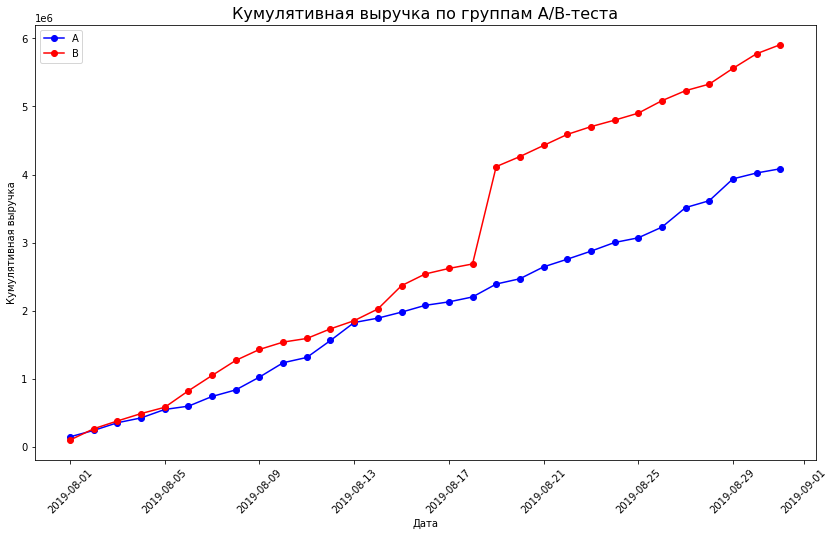

In [20]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(14, 8))
plt.xticks(rotation=45)

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='А', marker='o', color='blue')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B', marker='o', color='red')

plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам A/B-теста', fontsize=16)
plt.legend()
plt.show()

Несмотря на то, что в обеих группах **выручка** продолжает активно расти, очевидно, что **в группе B** она **существенно выше** и относительность роста между группами стабильна с середины августа.

Также можно отметить резкий скачок выручки в группе B, произошедший 19.08 и определивший основное преимущество группы B. Этот всплеск может быть связан либо с большим числом заказов (возможно акция), либо с отдельными дорогими заказами.

### График кумулятивного среднего чека

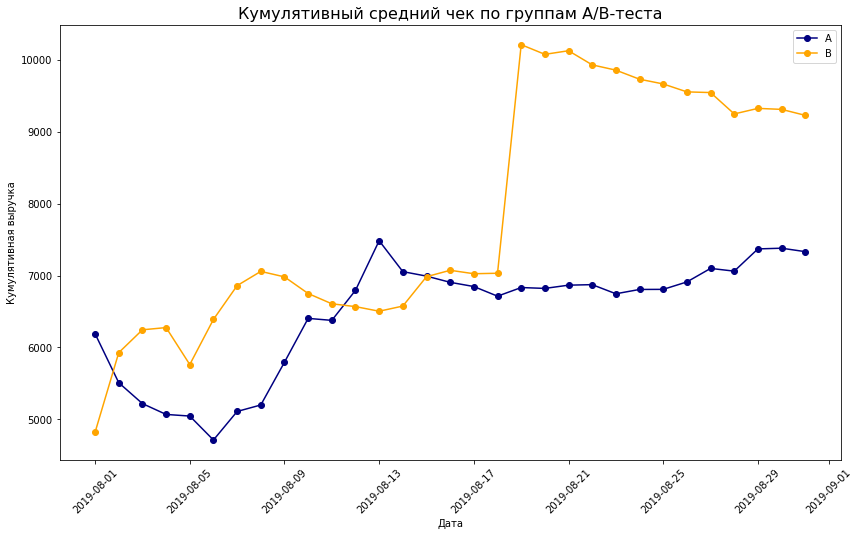

In [21]:
# Строим график выручки группы А
plt.figure(figsize=(14, 8))
plt.xticks(rotation=45)

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'],
         label='А', marker='o', color='navy')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'],
         label='B', marker='o', color='orange')

plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек по группам A/B-теста', fontsize=16)
plt.legend()
plt.show()

На этом графике скачок 19.08 в группе B еще более резкий. После него наблюдается стабильное падение размера среднего чека, в отличие от медленного роста в группе А. 

Нужно больше данных, чтобы средний чек в группе В пришел к реальному значению.

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [22]:
# собираем данные в одном датафрейме
cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', 
                                                     suffixes=['A', 'B'])

cumulative_revenue.sample(3)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
19,2019-08-20,2469529,362,4263815,423
1,2019-08-02,242401,44,266748,45


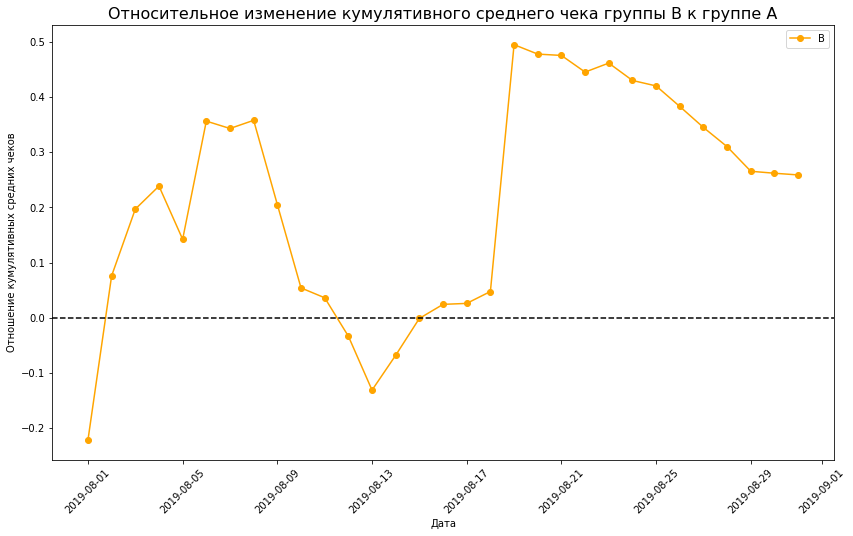

In [23]:
plt.figure(figsize=(14, 8))
plt.xticks(rotation=45)

# cтроим отношение средних чеков
plt.plot(cumulative_revenue['date'], (cumulative_revenue['revenueB']/cumulative_revenue['ordersB'])/
                                          (cumulative_revenue['revenueA']/cumulative_revenue['ordersA'])-1, label='B',
                                           marker='o', color='orange')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.ylabel('Отношение кумулятивных средних чеков')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=16)
plt.legend()
plt.show()

Наблюдаем более выраженно падение выручки в группе B и ее приближение к уровню в группе А.

+ Несмотря на то, что в обеих группах **выручка** продолжает активно расти, **в группе B** она **существенно выше**.
+ 19.08 в группе B произошел сильный подъем выручки, который и определил дальнейшее преимущество.
+ Предположительно данный скачок связан с какой-то разовой акцией или крупными заказами.
+ В дальнейшем средний чек группы B показал **стабильное падение**, а группы А **рост**.
+ Средний чек в группе B **не соответствует** реальному среднему чеку, т.к. искажен вышеописанным выбросом.

### График кумулятивного количества заказов на пользователя

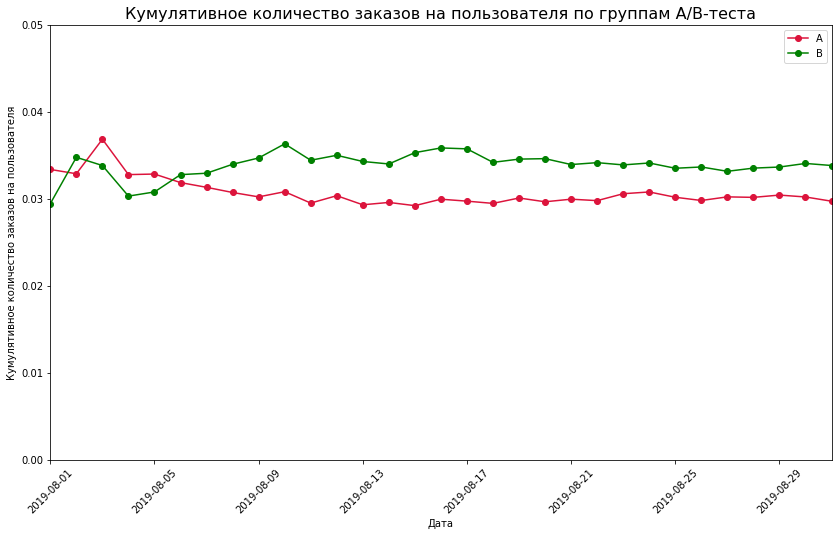

In [24]:
# создаем новую колонку с расчетом кумулятивой конверсии
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(14, 8))
plt.xticks(rotation=45)

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A', marker='o', color='crimson')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B', marker='o', color='green')

# задаем масштаб осей
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), 0, 0.05])

plt.ylabel('Кумулятивное количество заказов на пользователя')
plt.xlabel('Дата')
plt.title('Кумулятивное количество заказов на пользователя по группам A/B-теста', fontsize=16)
plt.legend()
plt.show()

Динамика стабилизировалась с середины августа. Небольшое преимущество за группой В.

### График относительного изменения кумулятивного количества заказов на пользователя группы B к группе A

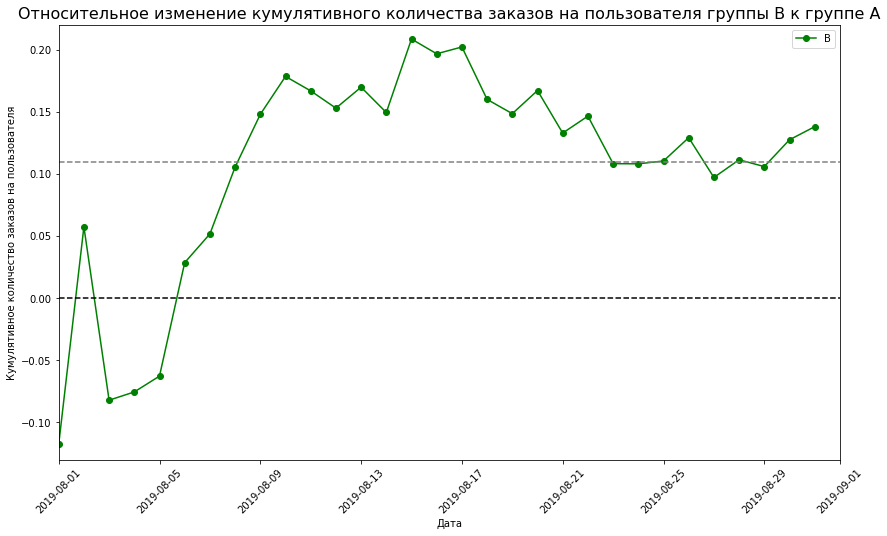

In [25]:
cumulative_conversions = ( cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], 
                                                                             left_on='date', right_on='date', how='left', 
                                                                             suffixes=['A', 'B'])
                              )

plt.figure(figsize=(14, 8))
plt.xticks(rotation=45)

plt.plot(cumulative_conversions['date'], 
         cumulative_conversions['conversionB']/cumulative_conversions['conversionA']-1, label='В', 
         marker='o', color='green')
plt.ylabel('Кумулятивное количество заказов на пользователя')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного количества заказов на пользователя группы B к группе A', fontsize=16)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.11, color='grey', linestyle='--')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-09-01'), -0.13, 0.22])
plt.show()

Количество заказов на пользователя в группе В обогнало группу А на 21% к середине августа, затем, после постепенного снижения, привысило от 10 до 14% в последней трети августа.

Количество заказов на пользователя в группе B выше, чем в группе А в среднем на 11%.

### График количества заказов по пользователям

In [26]:
# подсчитаем количество заказов по пользователям 
orders_by_users = orders.drop(['group', 'revenue', 'date'], axis=1)\
                      .groupby('user_id', as_index=False)\
                      .agg({'order_id' : pd.Series.nunique})
orders_by_users.columns = ['user_id','orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


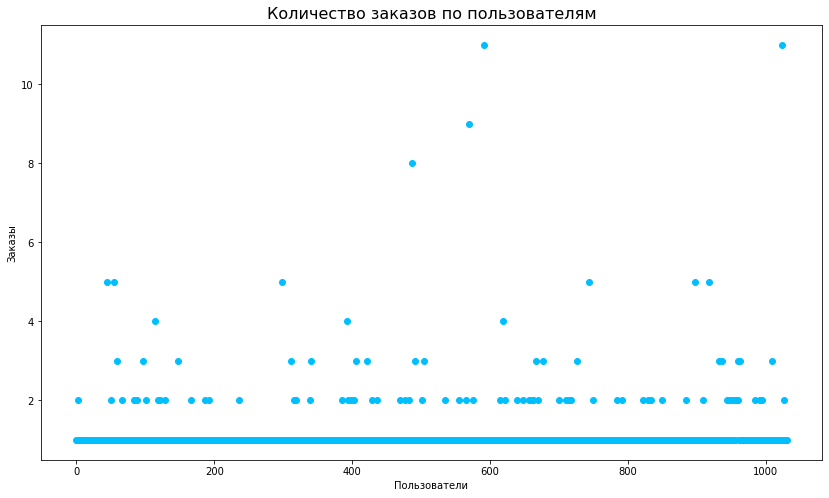

In [27]:
# серия из чисел от 0 до количества наблюдений в orders_by_users
x_values = pd.Series(range(0,len(orders_by_users)))

# построим точечный график количества заказов по пользователям
plt.figure(figsize=(14, 8))
plt.scatter(x_values, orders_by_users['orders'], color='deepskyblue')
plt.xlabel('Пользователи')
plt.ylabel('Заказы')
plt.title('Количество заказов по пользователям', fontsize=16)
plt.show()

Распределение заказов по пользователям выглядит нормальным: подавляющая часть сделала по 1 заказу, достаточно много тех, кто сделал 2 заказа, совсем мало сделавших более 2. Посмотрим более точные доли в расчете перцентилей.

### Перцентили количества заказов на пользователя
Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [28]:
percentiles = np.percentile(orders_by_users['orders'], [95, 99])
print('95-й перцентиль количества заказов на пользователя: {} заказа'.format(percentiles[0]))
print('99-й перцентиль количества заказов на пользователя: {} заказа'.format(percentiles[1]))

95-й перцентиль количества заказов на пользователя: 2.0 заказа
99-й перцентиль количества заказов на пользователя: 4.0 заказа


+ Не более 5% пользователей оформили больше, чем 2 заказа.

Возьмем эту границу как верхнюю - пользователей с более, чем 2 заказами будем считать аномальными.

### График стоимостей заказов

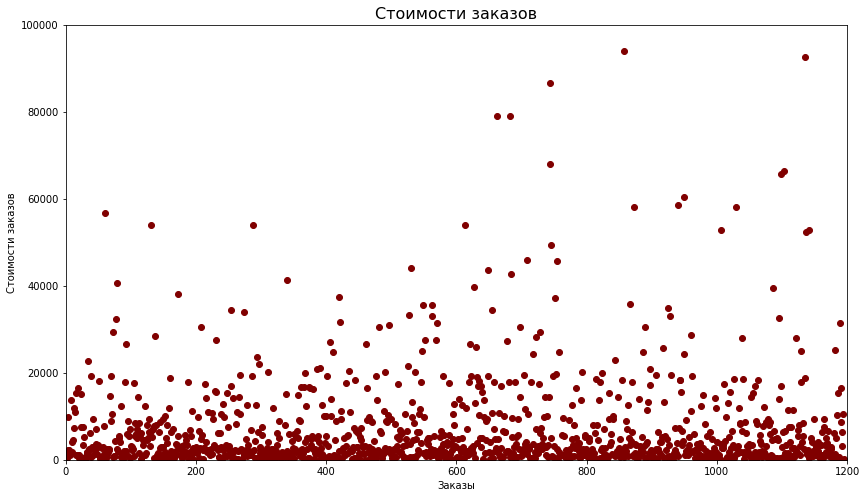

count   1197.00   
mean    8348.01   
std     39191.13  
min     50.00     
25%     1220.00   
50%     2978.00   
75%     8290.00   
max     1294500.00
Name: revenue, dtype: float64

In [29]:
# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0,len(orders)))

# построим точечный график стоимостей заказов
plt.figure(figsize=(14, 8))
plt.scatter(x_values, orders['revenue'], color='maroon')
plt.xlabel('Заказы')
plt.ylabel('Стоимости заказов')
plt.title('Cтоимости заказов', fontsize=16)
plt.axis([0, 1200, 0, 100000])
plt.show()
orders['revenue'].describe()

Основная часть заказов стоит меньше 10 000, границу аномальных заказов можно установить от 20 000. Есть и супераномальные заказы, такие как за 1 294 500. Они сильно искажают средние значения.

Для окончательного определения нормальных границ рассчитаем перцентили.

### Перцентили стоимости заказов
Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [30]:
percentiles = np.percentile(orders['revenue'], [95, 99])
print('95-й перцентиль стоимости заказов: {:.0f}'.format(percentiles[0]))
print('99-й перцентиль стоимости заказов: {:.0f}'.format(percentiles[1]))

95-й перцентиль стоимости заказов: 28000
99-й перцентиль стоимости заказов: 58233


+ Не более 5% заказов стоят больше, чем 28 000.

Возьмем эту границу как верхнюю - заказы дороже 28 000 будем считать **аномальными**.

## Выводы

1. Графики **среднего чека** показывают, что результаты группы B лучше группы A. Но это преимущество связано с **большим выбросом**.
2. Графики **конверсии** показывают, что она выше в группе B на 11%.
3. Графики количества и стоимостей заказов показывают наличие аномальных значений, а расчет перцентилей уточняет их число: аномальными решено считать количество заказов выше 2 и стоимость выше 28 000.

# Статистический анализ A/B-теста

Проанализируем результаты A/B-теста, которые содержатся в датасетах `orders` и `visitors`, используя критерий Уилкоксона-Манна-Уитни и расчета относительных значений между группами по "сырым" и "очищенным" данным.

## Датафрейм `data` и выборки с "сырыми" данными
Создадим датафрейм `data`, в котором объединим необходимые для статистического анализа кумулятивные данные.

In [31]:
# количество пользователей в выбранную дату в группе A
visitors_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# количество пользователей до выбранной даты включительно в группе A
visitors_a_cummulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <=x['date']]\
                                     .agg({'date' : 'max', 'visitors_per_date_a' : 'sum'}), axis=1)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# количество пользователей в выбранную дату в группе B
visitors_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# количество пользователей до выбранной даты включительно в группе В
visitors_b_cummulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <=x['date']]\
                                     .agg({'date' : 'max', 'visitors_per_date_b' : 'sum'}), axis=1)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# количество заказов и суммарная выручка в выбранную дату в группе A
orders_a_daily = orders[orders['group']=='A'][['date', 'order_id', 'user_id', 'revenue']].groupby('date', as_index=False)\
                                     .agg({'order_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# суммарное число заказов и суммарная выручка до выбранной даты включительно в группе A
orders_a_cummulative = orders_a_daily.apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]\
                                 .agg({'date' : 'max', 'orders_per_date_a' : 'sum', 'revenue_per_date_a' : 'sum'}), axis=1)\
                                 .sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

# количество заказов и суммарная выручка в выбранную дату в группе B
orders_b_daily = orders[orders['group']=='B'][['date', 'order_id', 'user_id', 'revenue']].groupby('date', as_index=False)\
                                     .agg({'order_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# суммарное число заказов и суммарная выручка до выбранной даты включительно в группе В
orders_b_cummulative = orders_b_daily.apply(lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]\
                                 .agg({'date' : 'max', 'orders_per_date_b' : 'sum', 'revenue_per_date_b' : 'sum'}), axis=1)\
                                 .sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

# объединение в один датафрейм data
data = orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')\
                   .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')\
                   .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitors_a_daily, left_on='date', right_on='date', how='left')\
                   .merge(visitors_b_daily, left_on='date', right_on='date', how='left')\
                   .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')\
                   .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')

data.head(3)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803


Описание данных датафрейма `data`:

+ `date` — дата;
+ `orders_per_date_a` — количество заказов в выбранную дату в группе A;
+ `revenue_per_date_a` — суммарная выручка в выбранную дату в группе A;
+ `orders_per_date_b` — количество заказов в выбранную дату в группе B;
+ `revenue_per_date_b` — суммарная выручка в выбранную дату в группе B;
+ `orders_cummulative_a` — суммарное число заказов до выбранной даты включительно в группе A;
+ `revenue_cummulative_a` — суммарная выручка до выбранной даты включительно в группе A;
+ `orders_cummulative_b` — суммарное количество заказов до выбранной даты включительно в группе B;
+ `revenue_cummulative_b` — суммарная выручка до выбранной даты включительно в группе B;
+ `visitors_per_date_a` — количество пользователей в выбранную дату в группе A;
+ `visitors_per_date_b` — количество пользователей в выбранную дату в группе B;
+ `visitors_cummulative_a` — количество пользователей до выбранной даты включительно в группе A;
+ `visitors_cummulative_b` — количество пользователей до выбранной даты включительно в группе B.

Подготовим выборки с "сырыми" (содержащими аномальные значения) данными.

In [32]:
# создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['user_id', 'orders'] 
# в них для каждого пользователя, который сделал хотя бы 1 заказ будет указано количество совершённых заказов
orders_by_users_a = orders[orders['group']=='A'].groupby('user_id', as_index=False).agg({'order_id' : pd.Series.nunique})
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = orders[orders['group']=='B'].groupby('user_id', as_index=False).agg({'order_id' : pd.Series.nunique})
orders_by_users_b.columns = ['user_id', 'orders']

# объявим переменные sample_a и sample_b, в которых пользователям из каждой группы А/В теста 
# будет соответствовать количество совершённых заказов 
# тем, кто ничего не заказал, будут соответствовать нули
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, 
                     index=np.arange(data['visitors_per_date_a'].sum() 
                                     - len(orders_by_users_a['orders'])), name='orders')],axis=0)
sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, 
                     index=np.arange(data['visitors_per_date_b'].sum() 
                                     - len(orders_by_users_b['orders'])), name='orders')],axis=0)

## Статистическая значимость различий в конверсии между группами по «сырым» данным
Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

Сформулируем статистические гипотезы:

**H0** — конверсия в группе А и группе В одинаковая.

**H1** — конверсия в группе А и группе В различается.

Применим статистический критерий Уилкоксона-Манна-Уитни к полученным выборкам.

In [33]:
# критический уровень статистической значимости зададим 5% поскольку у нас двусторонняя гипотеза и 
# вероятность отклониться от центра распределения в каждую сторону уменьшится до 2,5% 
# и это стандартная величина, обычно использующаяся в статистических тестах
alpha = .05 

pvalue = stats.mannwhitneyu(sample_a, sample_b)[1]

print("p-value: {0:.3f}".format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: конверсия в группе А и группе В по "сырым" данным различается.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: конверсия в группе А и группе В по "сырым" данным одинаковая.')
    
# относительное различие в конверсии между группами
print('Относительное значение конверсии группы B по отношению к группе A по "сырым" данным: {0:.3f}'
      .format(sample_b.mean()/sample_a.mean()-1)) 

p-value: 0.017
Отвергаем нулевую гипотезу: конверсия в группе А и группе В по "сырым" данным различается.
Относительное значение конверсии группы B по отношению к группе A по "сырым" данным: 0.138


**Выводы** 
1. Статистическая проверка по "сырым" данным подтвердила, что **конверсия** в группах А/В теста **различается**.
2. Прирост конверсии группы B по отношению к группе A равен 13,8%.

## Статистическая значимость различий в среднем чеке между группами по «сырым» данным
Сформулируем статистические гипотезы:

**H0** — средний чек в группе А и группе В одинаковый.

**H1** — средний чек в группе А и группе В различается.

Применим статистический критерий Уилкоксона-Манна-Уитни.

In [34]:
# критический уровень статистической значимости зададим 5% 
alpha = .05 

# передадим критерию mannwhitneyu() данные о выручке с заказов
pvalue = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print("p-value: {0:.3f}".format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средний чек в группе А и группе В по "сырым" данным различается.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средний чек в группе А и группе В по "сырым" данным одинаковый.')
    
# относительное различие в конверсии между группами
print('Относительное значение среднего чека группы B по отношению к группе A по "сырым" данным: {0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Не получилось отвергнуть нулевую гипотезу: средний чек в группе А и группе В по "сырым" данным одинаковый.
Относительное значение среднего чека группы B по отношению к группе A по "сырым" данным: 0.259


**Выводы** 

1. Статистическая проверка по "сырым" данным показала, что **средний чек** в группах А/В **одинаковый**. Что подтверждает наше предположение об искажении этой метрики выбросом.
2. При этом прирост среднего чека группы B по отношению к группе A равен 25,9%.

## Датафрейм `abnormal_date` и выборки с "очищенными" данными

Для "очистки" данных применим определенные ранее границы для аномальных значений: не более 2 заказов или стоимость заказа не выше 28 000. Так мы уберём 5% пользователей с аномальным количеством заказов и от 1% до 5% пользователей с аномально дорогими заказами.

Подготовим датафрейм `abnormal_date` с соответствующими срезами:

In [35]:
# срез пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. 

#  срезы пользователей с числом заказов больше 2 — `usersWithManyOrders`
users_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > orders_by_users_a['orders'].quantile(0.95)]['user_id'], 
        orders_by_users_b[orders_by_users_b['orders'] > orders_by_users_b['orders'].quantile(0.95)]['user_id'], 
    ],           
                          axis = 0,
                          )

users_expensive_orders = orders[orders['revenue'] > orders['revenue'].quantile(0.95)]['user_id']

# объединим их в таблице abnormal_date
abnormal_date = pd.concat([users_many_orders, users_expensive_orders], axis=0).drop_duplicates().sort_values()

# сколько всего аномальных пользователей
print('Всего аномальных пользователей: {}'.format(len(abnormal_date))) 

Всего аномальных пользователей: 74


Подготовим выборки c "очищенными" данными.

In [36]:
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id']
                                                           .isin(abnormal_date))]['orders'], 
                               pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() 
                                                            - len(orders_by_users_a['orders'])),
                                         name='orders')],axis=0)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id']
                                                           .isin(abnormal_date))]['orders'],
                               pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum() 
                                                            - len(orders_by_users_b['orders'])),
                                         name='orders')],axis=0)

## Статистическая значимость различий в конверсии между группами по «очищенным» данным
Сформулируем статистические гипотезы:

**H0** — конверсия в группе А и группе В одинаковая.

**H1** — конверсия в группе А и группе В различается.

Применим статистический критерий Уилкоксона-Манна-Уитни к полученным выборкам.

In [37]:
# критический уровень статистической значимости зададим 5% 
alpha = .05 

pvalue = stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

print("p-value: {0:.3f}".format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: конверсия в группе А и группе В по "очищенным" данным различается.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: конверсия в группе А и группе В по "очищенным" данным одинаковая.')
    
# относительное различие в конверсии между группами
print('Относительное значение конверсии группы B по отношению к группе A по "очищенным" данным: {0:.3f}'
      .format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)) 

p-value: 0.013
Отвергаем нулевую гипотезу: конверсия в группе А и группе В по "очищенным" данным различается.
Относительное значение конверсии группы B по отношению к группе A по "очищенным" данным: 0.173


**Выводы**

1. Статистическая проверка по "очищенным" данным показала такой же результат, как и по "сырым" - **конверсия** в группах А/В теста **различается**.
2. Прирост конверсии группы B по отношению к группе A по "очищенным" данным вырос на 3,5% по сравнению с результатом по "сырым" данным и равен 17,3%. Значит, **аномальных пользователей в группе А** было **больше**.

## Статистическая значимость различий в среднем чеке между группами по «очищенным» данным
Сформулируем статистические гипотезы:

**H0** — средний чек в группе А и группе В одинаковый.

**H1** — средний чек в группе А и группе В различается.

Применим статистический критерий Уилкоксона-Манна-Уитни.

In [38]:
# критический уровень статистической значимости зададим 5% 
alpha = .05 

# передадим критерию mannwhitneyu() данные о выручке с заказов
pvalue = stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['user_id'].isin(abnormal_date)))]['revenue'], 
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['user_id'].isin(abnormal_date)))]['revenue'])[1]

print("p-value: {0:.3f}".format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средний чек в группе А и группе В по "очищенным" данным различается.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: средний чек в группе А и группе В по "очищенным" данным одинаковый')
    
# относительное различие в конверсии между группами
print('Относительное значение среднего чека группы B по отношению к группе A по "очищенным" данным: {0:.3f}'
      .format(orders[np.logical_and(orders['group']=='B', np.logical_not(
                 orders['user_id'].isin(abnormal_date)))]['revenue'].mean()/orders[np.logical_and(
                    orders['group']=='A', np.logical_not(orders['user_id'].isin(abnormal_date)))]['revenue'].mean() - 1)) 

p-value: 0.738
Не получилось отвергнуть нулевую гипотезу: средний чек в группе А и группе В по "очищенным" данным одинаковый
Относительное значение среднего чека группы B по отношению к группе A по "очищенным" данным: -0.020


**Выводы**
1. Статистическая проверка по "очищенным" данным показала такой же результат, как и по "сырым" - **средний чек** в группах А/В теста **одинаковый**.
2. Значение среднего чека группы B по отношению к группе A по "очищенным" данным по сравнению со значением по "сырым" **радикально изменилось**, упав с 25,9% до - 2%. Влияние аномалий в данном случае было очень существенно.

## Выводы

1. **Конверсия** по"сырым" по "очищенным" данным в группах А/В теста **различается**. Прирост конверсии группы B по отношению к группе A по "очищенным" данным вырос на 3,5% по сравнению с результатом по "сырым" данным и равен 17,3%.
2. **Средний чек** по"сырым" по "очищенным" данным в группах А/В теста **одинаковый**. Падение среднего чека группы B по отношению к группе A по "очищенным" данным по сравнению со значением по "сырым" составило с 25,9% до - 2%.


# Общие выводы
1. По результатам RICE **приоритетной** была определена **гипотеза №7** - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". У нее 112 баллов против 56 баллов следующей за ней **гипотезы №2**: "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа".
2. В результате исследовательского и статистического анализа среднего чека и конверсии двух групп A/B теста принято решение **остановить тест**, т.к. несмотря на то, что средний чек в группах одинаковый, конверсия имеет статистически значимые различия и в группе В больше, чем в группе А на 17%, поэтому мы можем зафиксировать **победу группы В**.